In [10]:
#%matplotlib inline
#%autosave 60
#%auto
#typeset_mode(True, display=true)
# date today

[//]: # (table styling via markdown) 
<style> table.dataframe { font-size:70%; } 
        body            { font-size:70%}
</style>

# Efficient Frontier Stuff

1 [Formulae](#1)  
 1.1 [Hyperbolae](#1.1)  
 1.2 [Solve for sigma](#1.2)    
 1.3 [Solve for mu](#1.3)  
 1.4 [Efficient frontier minimum](#1.4)  
 1.5 [sigma & mu at minimum](#1.5)

2 [Solve for sigma & mu using sympy](#2)

3 [Numerical example](#3)

4 [Plot symbolic equation](#4)

5 [Explicit formulae - for 3 assets](#5)

do imports, keep variables in a dict as a workspace

In [11]:
# all imports: for symbolic manipulation and for numerical example
import datetime
import sympy as sym
from sympy.matrices import matrix_multiply_elementwise as mme
from sympy.plotting import plot as symplot
import IPython.display as disp
import numpy as np
from numpy import linalg as LA
print("imports done")

ws = {}
ws['date'] = datetime.datetime.now().isoformat()[:16].replace(':','')
ws


imports done


{'date': '2020-04-03T1710'}

## 1 Efficient Frontier Formulae Manipulations <a class="anchor" id="1"></a>

This note shows some manipulations for the hyperbola curve of the efficient frontier.

1. Re-arrange efficient frontier equation for risk($\sigma$) and for return($\mu$)

2. Calculate intermediate scalars A,B,C,D from matrix of covariance and vector of returns, numerically and symbolically

3. Plot hyperbola of risk/return

4. Derive mimimum risk = hyperbola and apex

Reference (using their notation): Beste, Leventhal, Williams, & Dr. Qin Lu "Markowitz Review Paper" http://ramanujan.math.trinity.edu/tumath/research/studpapers/s21.pdf 


### 1.1 hyperbola equation <a class="anchor" id="1.1"></a>

efficient frontier hyperbola:

$$ \frac{\sigma^2}{1/C} - \frac{(\mu - A/C)^2}{D/C^2} = 1 $$


where:

$$ A = \mathbf{1}^T V^{-1} e = e^T V^{-1}\mathbf{1} $$

$$ B = e^T V^{-1} e $$

$$ C = \mathbf{1}^T V^{-1} \mathbf{1} $$

$$ D = BC - A^2 $$

$e$ = expected returns vector

$V$ = covariance matrix

$\mathbf{1}$ = Identity Matrix

### 1.2: solve for sigma: $\sigma$ <a class="anchor" id="1.2"></a>

$$ \frac{\sigma^2}{(1/C)} - \frac{(\mu - A/C)^2}{(D/C^2)} = 1 $$

$$ \frac{\sigma^2}{(1/C)} = 1 + \frac{(\mu - A/C)^2}{(D/C^2)} $$

divide by $C$:

$$ \frac{\sigma^2}{(C/C)} = \frac{1}{C} + \frac{(\mu - A/C)^2}{(DC/C^2)} $$

$$ \sigma^2 = \frac{1}{C} + \frac{(\mu - A/C)^2}{(D/C)} $$

$$ \sigma^2 = \frac{1}{C} + \frac{(\mu - A/C)^2C}{D} $$

$$ \sigma^2 = \frac{1}{C} + \frac{\mu^2C - 2\mu A + A^2/C}{D} $$

$$ \sigma^2 = \frac{D + \mu^2C^2 - 2\mu AC + A^2}{CD} $$

$$ \sigma^2 = \frac{D + (\mu C -A)^2}{CD} $$

$$ \sigma = \sqrt{\frac{D + (\mu C -A)^2}{CD}} $$

### 1.3: solve for mu: $\mu$ <a class="anchor" id="1.3"></a>

$$ \frac{\sigma^2}{(1/C)} - \frac{(\mu - A/C)^2}{(D/C^2)} = 1 $$

$$ \frac{\sigma^2}{(1/C)} -1 = \frac{(\mu - A/C)^2}{(D/C^2)} $$

multiply through by $ D/C^2 $

$$ \frac{\sigma^2 D}{(C^2/C)} - \frac{D}{C^2}  =  (\mu - A/C)^2 $$

$$ \sqrt{\frac{\sigma^2 D}{C} - \frac{D}{C^2}} =  (\mu - A/C) $$

$$ \sqrt{\frac{D(\sigma^2 C - 1)}{C^2}} =  (\mu - A/C) $$

$$ \mu = \frac{\sqrt{D(\sigma^2 C - 1)}}{C} + A/C $$

$$ \mu = \frac{\sqrt{D(\sigma^2 C - 1)}+A}{C} $$

### 1.4: efficient frontier minimum $\sigma$ <a class="anchor" id="1.4"></a>

efficient frontier hyperbola coordinates of minimum:

$$ (\sigma, \mu) = ( \sqrt{1/C},  ( A/C )) $$

### 1.5: (sigma, mu) coordinates at minimum $\sigma$ <a class="anchor" id="1.5"></a>
$$ \sigma^2 = \frac{D + (\mu C -A)^2}{CD} $$

let $\mu = A/C$

$$ \sigma^2 = \frac{D + ((A/C)C - A)^2}{CD} $$

$$ \sigma^2 = \frac{D + (A - A)^2}{CD} $$

$$ \sigma^2 = \frac{1}{C} $$



## 2: manipulate equation using sympy - solve for $\sigma$ <a class="anchor" id="2"></a>

take positive solution only

In [18]:
mu, sigma, A, B, C, D = sym.symbols('mu sigma A B C D')
ws['sigamEqn'] = sym.solve(sym.Eq( (sigma**2 / (1/C)) - ((mu - A/C)**2 / (D / C**2)), 1) , sigma)[1] # [1]=> +ve soln
ws['sigamEqn']

sqrt((A**2 - 2*A*C*mu + C**2*mu**2 + D)/(C*D))

simplify:

In [19]:
sym.factor(sym.Eq(sigma, ws['sigamEqn']))

Eq(sigma, sqrt(A**2/(C*D) - 2*A*mu/D + C*mu**2/D + 1/C))

check: subtract original form from simplified ("factored") form:

In [20]:
ws['sigamEqn'] - sym.factor(ws['sigamEqn'])

sqrt((A**2 - 2*A*C*mu + C**2*mu**2 + D)/(C*D)) - sqrt(A**2/(C*D) - 2*A*mu/D + C*mu**2/D + 1/C)

gives:

In [16]:
sym.factor(ws['sigamEqn'] - sym.factor(ws['sigamEqn']))

0

## 3 numerical example <a class="anchor" id="3"></a>
Calculate A, B, C, & D, hence $\sigma$ and $\mu$, for a small example of 3 assets

sample annualized expected returns, in percent:

In [69]:
ws['prec'] = 4 # number of digits of precision to display numerical values

#ws['mu3'] = sym.Matrix(np.array([0.1, 0.05, 0.03]).T) # mu3 = sym.Matrix(mu3)
ws['mu3'] = sym.Matrix(np.array([5.1, 7.0, 0.9]).T) # mu3 = sym.Matrix(mu3)

ws['mu3']

Matrix([
[5.1],
[7.0],
[0.9]])

*cor3*: sample correlations:

In [114]:
#ws['cor3'] = sym.Matrix([[ 1.,          0.61229076, -0.13636468],
#                         [ 0.61229076,  1.,         -0.29579264],
#                         [-0.13636468, -0.29579264,  1.        ]])
ws['cor3'] = sym.Matrix([[  1.0,  0.5,  0.4],
                         [  0.5,  1.0, -0.1],
                         [  0.4, -0.1, 1.0]])
sym.N(ws['cor3'], ws['prec'])

Matrix([
[1.0,  0.5,  0.4],
[0.5,  1.0, -0.1],
[0.4, -0.1,  1.0]])

*vol3*: sample vols (stdev):

In [115]:
#ws['vol3'] = sym.Matrix([ 0.05,  0.08,  0.02])
ws['vol3'] = sym.Matrix([ 3.5,  4.2,  1.1]) 
sym.N(ws['vol3'], ws['prec'])

Matrix([
[3.5],
[4.2],
[1.1]])

*cov3*: compose to make covariance matrix:

In [116]:
ws['cov3'] = mme(ws['vol3'] * ws['vol3'].T, ws['cor3']) # mme = element-wise multiply
sym.N(ws['cov3'], ws['prec'])

Matrix([
[12.25,   7.35,   1.54],
[ 7.35,  17.64, -0.462],
[ 1.54, -0.462,   1.21]])

check that $${variance} = vol^2$$, $$diag(cov3) = vol3^2$$ 

In [117]:
sym.diag(*ws['vol3'])**2   # how to do sqrt of diagonal matrix in sympy???

Matrix([
[12.25,     0,    0],
[    0, 17.64,    0],
[    0,     0, 1.21]])

check: get correlations back from covariance

in index subscript form:
$$ r_{ij} = \frac{c_{ij}}{c_{ii}*c_{jj}}$$

in matrix form: $$ cor = vol^{-1}  \times cov \times  vol^{-1} $$

where $$ vol = \sqrt{diag(cov)} $$ as a diagonal matrix

*vol*:

In [118]:
ws['oneOverVol'] = sym.diag(*ws['cov3'].diagonal())**(-0.5) # works!!!! using sym.sqrt doesn't evaluate fully
ws['oneOverVol'] * ws['cov3'] * ws['oneOverVol']            # oneOverVol is diagonal matrix so it's equal to its transpose

Matrix([
[1.0,  0.5,  0.4],
[0.5,  1.0, -0.1],
[0.4, -0.1,  1.0]])

### 3.1 sample values for calculating sample hyperbolae scalars A,B,C,D 

$A,B,C,D$ calculated numerically as variables a,b,c,d:

In [119]:
# try some new covariance:
# sample covariance matrix
#' ws['cov3'] = sym.Matrix([[1.61904762, 1.52285714, 0.90285714],
#                          [1.52285714, 1.88142857, 1.39309524],
#                          [0.90285714, 1.39309524, 1.95809524]])
#sym.N(ws['cov3'], ws['prec'])

vector of 3 ones:

In [120]:
ws['ones3'] = sym.Matrix([1,1,1])
ws['ones3']

Matrix([
[1],
[1],
[1]])

inverse of *cov*

In [121]:
sym.N(ws['cov3']**(-1), ws['prec'])

Matrix([
[  0.1497, -0.06803, -0.2164],
[-0.06803,  0.08818,  0.1202],
[ -0.2164,   0.1202,   1.148]])

check condition number of *cov* inverse:

In [122]:
sym.N(LA.cond(np.array(ws['cov3']**(-1), dtype=float)), ws['prec']) 

27.53

calculate $A$ from covariance $V = cov3$, and $e = mu3$

$$ matrix\ A = \mathbf{1}^T V^{-1} e == e^T V^{-1}\mathbf{1} $$

In [123]:
ws['a'] = ws['ones3'].T @ ws['cov3']**(-1) @ ws['mu3'] # = (mu3.T @ cov3**(-1) @ ones3.T)
sym.N(ws['a'], ws['prec'])

Matrix([[1.242]])

calculate $$B$$ from covariance $$V$$=cov3, and $$e$$=mu3: $ matrix\ B = e^T V^{-1} e $

In [124]:
ws['b'] = ws['mu3'].T @ ws['cov3']**(-1) @ ws['mu3'] 
sym.N(ws['b'], ws['prec'])

Matrix([[3.814]])

calculate $$C$$ from covariance $$V$$=cov3: $$ matrix\ C = \mathbf{1}^T V^{-1} \mathbf{1} $$

In [125]:
ws['c']  = ws['ones3'].T @ ws['cov3']**(-1) @ ws['ones3']
sym.N(ws['c'], ws['prec'])

Matrix([[1.057]])

calculate $$D$$ from covariance: $ matrix\ D = BC - A^2  $

In [126]:
ws['d'] = ws['b'] * ws['c'] - ws['a']**2
sym.N(ws['d'], ws['prec'])

Matrix([[2.491]])

### 3.2 hence calculate $\sigma$ or $\mu$ 
using $A, B, C, D$ calculate $\sigma$ and $\mu$ from each other

$ \sigma =   \sqrt{\frac{D + (\mu C - A)^2}{CD}} $
and
$ \mu    =    \frac{\sqrt{D(\sigma^2 C - 1)}+A}{C} $

e.g. for $\mu = 0.3$, $\sigma =$ 

In [127]:
print(' sigma from mu')
ws['sgma'] = ( (ws['d'] + (0.03 * ws['c'] - ws['a'])**2) / (ws['c']*ws['d']) )**(0.5)
sym.N(ws['sgma'], ws['prec'])

 sigma from mu


Matrix([[1.226]])

e.g. for $\sigma = 3.086$, $\mu =???$

In [128]:
print('mu from sigma)')
# check calculate back mu from sigma
#m = ( (d * (1.351**2 * c - 1))**(1/2) + a ) / c
#((ws['d'] * ((ws['sgma']**2 * ws['c']) - sym.Matrix([[1]])) )**(0.5) + ws['a'] ) / ws['c']
((ws['d'] * ((2**2 * ws['c']) + sym.Matrix([[1]])) )**(0.5) + ws['a'] ) / ws['c']


#sym.N(m, sPrec)

mu from sigma)


Matrix([[4.58803767855236]])

In [129]:
# mimimum: 
print("sigma, mu")
( (sym.Matrix([1]) / ws['c'])**(0.5), ws['a'] / ws['c'] )

sigma, mu


(Matrix([[0.972557105896013]]), Matrix([[1.17453312167395]]))

## 4: Symbolic Plot <a class="anchor" id="4"></a>

sigma vs mu

In [130]:
#fsigma = exp( (d + (mu*c-a)**2) / (c*d) ),0.5)
#fsigma = exp(( (d + (nu*c-a)**2) / (c*d) ) ,1)

In [132]:
#plot(fsigma,(mu,0.03,0.06), figsize=[4,4], legend_label='$\sigma(\mu)$') # rotated version

ws['fsgma'] = ( ( (ws['d'] + (ws['mu3']*ws['c'] - ws['a'])**2) / (ws['c'] * ws['d']) )**2)[0]
symplot(ws['fsgma'], (mu, -0.0, 0.3), axis_center=(0.0,0.0), xlabel='$\mu$ mu', ylabel='$\sigma$ sigma')
ws['fsgma']

ShapeError: Matrix size mismatch: (3, 1) + (1, 1)

mu vs sigma
 
$ \mu    =    \frac{\sqrt{D(\sigma^2 C - 1)}+A}{C} $

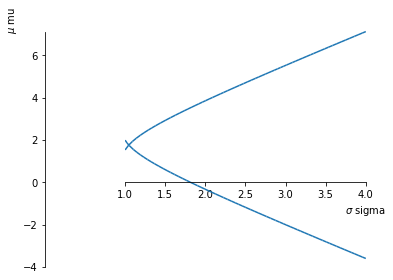

In [134]:
ws['fmuA'] = (( ws['a'] + (ws['d'] * (sigma**2 * ws['c'] - sym.Matrix([[1]]) ) )**0.5  ) / ws['c'])[0]
ws['fmuB'] = (( ws['a'] - (ws['d'] * (sigma**2 * ws['c'] - sym.Matrix([[1]]) ) )**0.5 + ws['a'] ) / ws['c'])[0]
p0 = symplot(ws['fmuA'], (sigma, 1, 4), axis_center=(0.0,0.0), ylabel='$\mu$ mu', xlabel='$\sigma$ sigma', show=False)
p1 = symplot(ws['fmuB'], (sigma, 1, 4), axis_center=(0.0,0.0), ylabel='$\mu$ mu', xlabel='$\sigma$ sigma', show=False)
p0.append(p1[0])
ws['fmu']
p0.show()

In [ ]:
def fmew(sigma, side, w):
    if side=='pos': return ( w['a'] + sqrt(w['d'] * (w['c'] * sigma^2-1)) ) / w['c']
    else          : return ( w['a'] - sqrt(w['d'] * (w['c'] * sigma^2-1)) ) / w['c']

#def fmew2(sigma):
#    if            : return ( a + sqrt(d*(c*sigma^2-1)) ) / c
#    else          : return ( a - sqrt(d*(c*sigma^2-1)) ) / c

for sgm in srange(0.01,0.02,0.001): print(sgm, fmew(sgm, 'neg', ws), fmew(sgm,'pos', ws))

In [ ]:
v = [(x, fmew(x,'neg')) for x in srange(1.125,1.119515028,-1e-6)]+[(x, fmew(x,'pos')) for x in srange(1.119515028,1.125,1e-6)]
#v = [(x, fmew(x,'neg')) for x in srange(0.02,0.01,-0.001)] + [(x, fmew(x,'pos')) for x in srange(0.01,0.02,0.001)]
line(v, figsize=[4,4])

## 5: Closed form formulae <a class="anchor" id="5"></a>

for small portfolio (3 assets) - covariance $V$

symbolic form of hyperbola in terms of asset covariances and returns:

(note symmetric entries)

In [37]:
u,s,A,B,C,D,E, s1,s2,s3, cv12,cv13,cv23, r0,r1,r2 = \
    sym.symbols('u s A B C D E  s1 s2 s3 cv12 cv13 cv23  r0 r1 r2')

V = sym.Matrix([[s1**2, cv12,  cv13],
                [cv12,  s2**2, cv23],
                [cv13,  cv23,  s3**2]])
V

Matrix([
[s1**2,  cv12,  cv13],
[ cv12, s2**2,  cv23],
[ cv13,  cv23, s3**2]])

just for fun, inverse of covariance matrix $V$:

In [48]:
V**(-1)

Matrix([
[(s1**2*s2**2*((-cv12**2 + s1**2*s2**2)*(-cv13**2 + s1**2*s3**2) - (-cv12*cv13 + cv23*s1**2)**2) - (-cv12*(-cv12*cv13 + cv23*s1**2) + cv13*(-cv12**2 + s1**2*s2**2))*(cv12*(-cv12*cv13 + cv23*s1**2) - cv13*(-cv12**2 + s1**2*s2**2)))/(s1**2*(-cv12**2 + s1**2*s2**2)*((-cv12**2 + s1**2*s2**2)*(-cv13**2 + s1**2*s3**2) - (-cv12*cv13 + cv23*s1**2)**2)), (-cv12*s1**2*((-cv12**2 + s1**2*s2**2)*(-cv13**2 + s1**2*s3**2) - (-cv12*cv13 + cv23*s1**2)**2) + s1**2*(-cv12*cv13 + cv23*s1**2)*(-cv12*(-cv12*cv13 + cv23*s1**2) + cv13*(-cv12**2 + s1**2*s2**2)))/(s1**2*(-cv12**2 + s1**2*s2**2)*((-cv12**2 + s1**2*s2**2)*(-cv13**2 + s1**2*s3**2) - (-cv12*cv13 + cv23*s1**2)**2)), -(-cv12*(-cv12*cv13 + cv23*s1**2) + cv13*(-cv12**2 + s1**2*s2**2))/((-cv12**2 + s1**2*s2**2)*(-cv13**2 + s1**2*s3**2) - (-cv12*cv13 + cv23*s1**2)**2)],
[                                                    (-cv12*((-cv12**2 + s1**2*s2**2)*(-cv13**2 + s1**2*s3**2) - (-cv12*cv13 + cv23*s1**2)**2) - (-cv12*cv13 + cv23*s1**2)*(cv12*

check multiply: $V \times V^{-1}$

In [49]:
sym.MatMul(V, V.inv(),doit=False) 

Matrix([
[s1**2,  cv12,  cv13],
[ cv12, s2**2,  cv23],
[ cv13,  cv23, s3**2]])*Matrix([
[(s1**2*s2**2*((-cv12**2 + s1**2*s2**2)*(-cv13**2 + s1**2*s3**2) - (-cv12*cv13 + cv23*s1**2)**2) - (-cv12*(-cv12*cv13 + cv23*s1**2) + cv13*(-cv12**2 + s1**2*s2**2))*(cv12*(-cv12*cv13 + cv23*s1**2) - cv13*(-cv12**2 + s1**2*s2**2)))/(s1**2*(-cv12**2 + s1**2*s2**2)*((-cv12**2 + s1**2*s2**2)*(-cv13**2 + s1**2*s3**2) - (-cv12*cv13 + cv23*s1**2)**2)), (-cv12*s1**2*((-cv12**2 + s1**2*s2**2)*(-cv13**2 + s1**2*s3**2) - (-cv12*cv13 + cv23*s1**2)**2) + s1**2*(-cv12*cv13 + cv23*s1**2)*(-cv12*(-cv12*cv13 + cv23*s1**2) + cv13*(-cv12**2 + s1**2*s2**2)))/(s1**2*(-cv12**2 + s1**2*s2**2)*((-cv12**2 + s1**2*s2**2)*(-cv13**2 + s1**2*s3**2) - (-cv12*cv13 + cv23*s1**2)**2)), -(-cv12*(-cv12*cv13 + cv23*s1**2) + cv13*(-cv12**2 + s1**2*s2**2))/((-cv12**2 + s1**2*s2**2)*(-cv13**2 + s1**2*s3**2) - (-cv12*cv13 + cv23*s1**2)**2)],
[                                                    (-cv12*((-cv12**2 + s1**2*s2**2)*(-cv13**2 + 

**=** 

In [50]:
sym.simplify(V @ V.inv())

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

In [ ]:
#sym.ask(sym.Q.symmetric(V.inv())) # only avaulable in SageMath/Cocalc?

In [ ]:
vi00,vi11,vi22, vi01,vi02,vi12 = sym.symbols('vi00, vi11, vi22, vi01, vi02, vi12')
Vi = sym.Matrix([[vi00, vi01, vi02],
                 [vi01, vi11, vi12],
                 [vi02, vi12, vi22]])
Vi

returns: $E$ =

In [55]:
E = sym.Matrix([r0,r1,r2]).T
E

Matrix([[r0, r1, r2]])

$$ A = \mathbf{1}^T V^{-1} e = e^T V^{-1}\mathbf{1} =$$

In [59]:
#A = ones3.T @ Vi.inv() # @ E.T
ws['ones3'].T @ V.inv() @ E.T 

Matrix([[r0*((cv12*(-cv12*cv13 + cv23*s1**2) - cv13*(-cv12**2 + s1**2*s2**2))/((-cv12**2 + s1**2*s2**2)*(-cv13**2 + s1**2*s3**2) - (-cv12*cv13 + cv23*s1**2)**2) + (-cv12*((-cv12**2 + s1**2*s2**2)*(-cv13**2 + s1**2*s3**2) - (-cv12*cv13 + cv23*s1**2)**2) - (-cv12*cv13 + cv23*s1**2)*(cv12*(-cv12*cv13 + cv23*s1**2) - cv13*(-cv12**2 + s1**2*s2**2)))/((-cv12**2 + s1**2*s2**2)*((-cv12**2 + s1**2*s2**2)*(-cv13**2 + s1**2*s3**2) - (-cv12*cv13 + cv23*s1**2)**2)) + (s1**2*s2**2*((-cv12**2 + s1**2*s2**2)*(-cv13**2 + s1**2*s3**2) - (-cv12*cv13 + cv23*s1**2)**2) - (-cv12*(-cv12*cv13 + cv23*s1**2) + cv13*(-cv12**2 + s1**2*s2**2))*(cv12*(-cv12*cv13 + cv23*s1**2) - cv13*(-cv12**2 + s1**2*s2**2)))/(s1**2*(-cv12**2 + s1**2*s2**2)*((-cv12**2 + s1**2*s2**2)*(-cv13**2 + s1**2*s3**2) - (-cv12*cv13 + cv23*s1**2)**2))) + r1*(-s1**2*(-cv12*cv13 + cv23*s1**2)/((-cv12**2 + s1**2*s2**2)*(-cv13**2 + s1**2*s3**2) - (-cv12*cv13 + cv23*s1**2)**2) + (s1**2*(-cv12*cv13 + cv23*s1**2)**2 + s1**2*((-cv12**2 + s1**2*s2**2)*

$ B = e^T V^{-1} e =$

In [ ]:
# B
B = (E.T * Vi * E)
B

$$ C = \mathbf{1}^T V^{-1} \mathbf{1} = $$

In [ ]:
# C
C = (ones3.T * Vi * ones3)[0,0]; C

$ D = BC - A**2  $

In [ ]:
# D
D = (B*C - A**2); D

In [ ]:
fsigmaSymb(u) = sqrt(D+(u*C-A)^2/(C*D)); fsigmaSymb

In [ ]:
fmuSymb(s) =  ( sqrt(D*(C*s^2-1)) + A) / C; fmuSymb

\begin{align}
\mbox{vi}_{00} + 2 \,
\mbox{vi}_{01} + 2 \, 
\mbox{vi}_{02} + 
\mbox{vi}_{11} + 2 \, 
\mbox{vi}_{12} + 
\mbox{vi}_{22}
\end{align}

In [ ]:
fmuSymb.diff(s)


